## 文件上传到数据库 

In [8]:
import sqlalchemy
from sqlalchemy import exc
import psycopg2
import pandas as pd 
import numpy as np
post_host = "10.8.10.23"
post_port = "5432"
post_user = "postgres"
post_password = "qianyi"
post_db_name = "user_label"
import warnings
warnings.filterwarnings("ignore")

##########################################################################
def conn_sqlalchemy(user,password,host,port,db_name):
    """
    make a connection to postgresql use sqlalchemy toolkit

    """
    try:
        url = 'postgresql://%s:%s@%s:%s/%s' %(user,password,host,port,db_name)
        engine = sqlalchemy.create_engine(url)

        

    except (Exception, exc.DisconnectionError) as e:
        return 1

    return engine

In [9]:
engine = conn_sqlalchemy(post_user,post_password,post_host,post_port,post_db_name) #  连接数据库 
# sql = 'select * from wb_user limit 1000'
# df = pd.read_sql(sql,engine).astype(str)
# df = df.loc[:,['_id','fan_num']]

In [10]:
df_food_kol = pd.read_csv('D:/datasets/qianyi/database/kol/food_gt10w.csv')
df_food_kol.head()

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,...,follow_num,tweet_num,brief_intro,authentication,label,kol_con,authen_seq,nick_name_seq,label_seq,briinfo_seq
0,3988622116,寻香美食,1,f,河南,NaN,6,·郑州大学05级,NaN,1984-04-18,...,790.0,30039.0,人们对于美食的眷恋，从来不是无缘由的，他们或是单纯地被美味击中了味蕾，或是被包裹于其间的情谊...,美食博主,新闻趣事,寻香美食人们对于美食的眷恋，从来不是无缘由的，他们或是单纯地被美味击中了味蕾，或是被包裹于其...,"['美食', '博主']","['寻香', '美食']","['新闻', '趣事']","['美食', '眷恋', '无缘', '单纯', '地被', '美味', '击中', '味蕾..."
1,5899491342,美食零食小吃货,0,m,安徽,合肥,6,·汉口学院98级,·情感公司2003年-2020年,2011-11-26,...,583.0,3969.0,商务合作：ok311331,作家 情感博主 微博原创视频博主,NaN,美食零食小吃货商务合作：ok311331nan作家 情感博主 微博原创视频博主,"['作家', '情感', '博主', '原创', '视频', '博主']","['美食', '零食', '小吃']",[],"['商务', '合作']"
2,2775614713,咸DAILY,1,f,上海,NaN,6,NaN,NaN,0001-00-00,...,866.0,5443.0,美食博主,美食博主,"旅遊,美食控","咸DAILY美食博主旅遊,美食控美食博主","['美食', '博主']",[],"['旅遊', '美食']","['美食', '博主']"
3,6256783198,空腹-KongFood,1,m,北京,朝阳区,6,NaN,NaN,2015-05-26,...,114.0,341.0,美食纪录片《空腹KongFood》官方微博。肚子饿了，就要好好吃饭！美味来袭，请空腹等待！商...,美食博主 美食视频自媒体,NaN,空腹-KongFood美食纪录片《空腹KongFood》官方微博。肚子饿了，就要好好吃饭！美...,"['美食', '博主', '美食', '视频', '媒体']",['空腹'],[],"['美食', '纪录片', '空腹', '官方', '肚子饿', '吃饭', '美味', '..."
4,6533733104,张遇冷,1,f,福建,厦门,6,NaN,NaN,1998-06-15,...,138.0,1250.0,少女吃甜💕,知名美食博主,NaN,张遇冷少女吃甜💕nan知名美食博主,"['知名', '美食', '博主']",['遇冷'],[],['少女']


In [11]:
# df_food_kol.to_sql('food_kol',con = engine, if_exists = 'append', index = False)

In [12]:
df_fun_kol = pd.read_csv('D:/datasets/qianyi/database/kol/fun_gt10w.csv')
df_fun_kol.head()

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,fan_num,follow_num,tweet_num,brief_intro,authentication,label,kol_con,con_seq
0,3015928115,国人养生殿孝基,0,m,北京,西城区,1,NaN,NaN,NaN,104664.0,2195.0,1110.0,XXXWL9527❤V,搞笑幽默博主,美女,国人养生殿孝基XXXWL9527❤V搞笑幽默博主,"['国人', '养生', '搞笑', '幽默', '博主']"
1,5025857653,果子,0,m,河南,郑州,6,NaN,NaN,狮子座,20166337.0,234.0,99327.0,商务合作v：55188955,搞笑幽默博主 微博原创视频博主 微博VLOG博主,NaN,果子商务合作v：55188955搞笑幽默博主 微博原创视频博主 微博VLOG博主,"['果子', '商务', '合作', '搞笑', '幽默', '博主', '原创', '视频..."
2,6811589462,喝大了,1,m,浙江,NaN,5,·浙江大学14级,·,1996-05-17,2026534.0,29.0,5774.0,关注我的听说都找到配对了。,搞笑幽默博主,NaN,喝大了关注我的听说都找到配对了。搞笑幽默博主,"['听说', '找到', '配对', '搞笑', '幽默', '博主']"
3,3145767770,街拍正能量,1,m,上海,NaN,6,·上海商学院94级,·新浪网技术（中国）有限公司2015年-2018年·白百合2009年-2015年,01-01,165682.0,985.0,16459.0,搞笑视频分享平台，欢迎投稿,微博VLOG博主 微博原创视频博主,"全城爆笑,萌图神吐槽,正能量博主",街拍正能量搞笑视频分享平台，欢迎投稿微博VLOG博主 微博原创视频博主,"['能量', '搞笑', '视频', '分享', '平台', '欢迎', '投稿', '博主..."
4,5893098413,戏精急诊科,1,m,海外,法国,6,NaN,NaN,2017-08-06,392640.0,100.0,1009.0,请排队看病，谢谢,搞笑幽默博主,NaN,戏精急诊科请排队看病，谢谢搞笑幽默博主,"['戏精', '急诊科', '排队', '看病', '谢谢', '搞笑', '幽默', '博主']"


In [13]:
# df_fun_kol.to_sql('fun_kol',con = engine, if_exists = 'append', index = False)

In [14]:
df_game_kol = pd.read_csv('D:/datasets/qianyi/database/kol/game_gt10w.csv')
df_game_kol.head()

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,fan_num,follow_num,tweet_num,brief_intro,authentication,label,kol_con,con_seq
0,2097210323,正宗好游戏,2,f,四川,成都,0,NaN,NaN,01-01,1031574.0,498.0,7091.0,最新最全的游戏综合资讯~尽在@正宗好游戏,NaN,"极品飞车,实况2014,游戏爱好者",正宗好游戏最新最全的游戏综合资讯~尽在@正宗好游戏nan,"['正宗', '游戏', '最全', '游戏', '综合', '资讯', '正宗', '游戏']"
1,1233143520,微为烟夕罗,1,f,上海,闸北区,7,NaN,NaN,NaN,152037.0,747.0,70060.0,叫我萝卜就口以 淘宝店铺：烟夕罗捏脸铺子,游戏博主,"微博刷屏王,宅,要命的处女座",微为烟夕罗叫我萝卜就口以 淘宝店铺：烟夕罗捏脸铺子游戏博主,"['萝卜', '淘宝', '店铺', '烟夕罗', '铺子', '游戏', '博主']"
2,5360483141,Ow_Diya,1,m,上海,NaN,7,NaN,·上海龙之队,1999-07-30,135387.0,345.0,868.0,就是人帅了一点游戏也打得好没办法的。,Shanghai Dragons上海龙之队成员,"游戏,vgdiya,电子竞技",Ow_Diya就是人帅了一点游戏也打得好没办法的。Shanghai Dragons上海龙之队成员,"['人帅', '游戏', '上海', '成员']"
3,3938580330,极客羊,1,m,广东,广州,6,NaN,·极客羊工作室（Geek Sheep Studio）2018年-至今,2018-04-13,106198.0,11.0,253.0,“万物皆可盘彩蛋，世事均能抠细节” 坚持用心做好每一个彩蛋视频～ 每周二周五更新～ (≧▽≦...,游戏博主,"彩蛋,游戏,软件",极客羊“万物皆可盘彩蛋，世事均能抠细节” 坚持用心做好每一个彩蛋视频～ 每周二周五更新～ (...,"['极客', '万物', '可盘', '彩蛋', '世事', '细节', '坚持', '用心..."
4,5821847482,手游日推君,1,m,北京,东城区,4,·北京大学15级,·商务合作QQ2990656965,天秤座,1496539.0,217.0,1584.0,宝藏游戏博主，商务合作QQ2990656965,游戏评测团成员 微博原创视频博主 游戏博主,"游戏,手游,KPL",手游日推君宝藏游戏博主，商务合作QQ2990656965游戏评测团成员 微博原创视频博主 游戏博主,"['手游', '宝藏', '游戏', '博主', '商务', '合作', '游戏', '评测..."


In [15]:
# df_game_kol.to_sql('game_kol',con = engine, if_exists = 'replace', index = False)

In [16]:
df_makeup_kol = pd.read_csv('D:/datasets/qianyi/database/kol/makeup_gt10w.csv')
df_makeup_kol.head()

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,fan_num,follow_num,tweet_num,brief_intro,authentication,label,kol_con
0,6111217365,你柚有点甜儿,1,f,上海,NaN,7,NaN,NaN,1995-08-31,2012320.0,162.0,1174.0,美妆 时尚 穿搭！,知名美妆博主 微博原创视频博主 微博VLOG博主,"吃喝玩乐,旅游摄影,化妆品","你柚有点甜儿美妆 时尚 穿搭！吃喝玩乐,旅游摄影,化妆品知名美妆博主 微博原创视频博主 微博..."
1,7294063713,六六酱llj,1,f,上海,NaN,4,NaN,NaN,1995-01-01,597497.0,45.0,159.0,专研美妆的资深空乘，有任何美妆方面的问题都可以帮你解决～合作VX:xuyan388（备注来意...,美妆博主 微博原创视频博主,NaN,六六酱llj专研美妆的资深空乘，有任何美妆方面的问题都可以帮你解决～合作VX:xuyan38...
2,7457579680,美妆挖掘机_,1,f,上海,NaN,4,NaN,NaN,1996-05-19,1143680.0,76.0,196.0,只有你想不到的美妆没有我挖不倒 合作加🛰caijia85,美妆博主,"美妆护肤,美妆控","美妆挖掘机_只有你想不到的美妆没有我挖不倒 合作加🛰caijia85美妆护肤,美妆控美妆博主"
3,6358577421,仙女也爱买,1,f,江苏,南京,2,·北京邮电大学09级,·徐州微达文化传播有限公司2016年-2017年,1993-11-28,141203.0,95.0,128824.0,专注种草拔草的美妆博~,时尚博主,"时尚,护肤,美妆","仙女也爱买专注种草拔草的美妆博~时尚,护肤,美妆时尚博主"
4,1564595531,-元气六六,1,f,广东,NaN,7,NaN,·么么哒1998年-2015年,01-01,391819.0,57.0,30109.0,喜欢买喜欢分享的美妆博主。,美妆博主,"口红,化妆,护肤","-元气六六喜欢买喜欢分享的美妆博主。口红,化妆,护肤美妆博主"


In [17]:
# df_makeup_kol.to_sql('makeup_kol',con = engine, if_exists = 'replace', index = False)

In [18]:
df_travel_kol = pd.read_csv('D:/datasets/qianyi/database/kol/travel_gt10w.csv')
df_travel_kol.head()

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,fan_num,follow_num,tweet_num,brief_intro,authentication,label,kol_con,con_seq
0,3263402975,我是CHLOE,0,f,上海,NaN,6,·华东理工大学,NaN,2000-03-01,228408.0,458.0,577.0,旅行玩家，去过五十几个国家,NaN,"穿衣美容,投资理财",我是CHLOE旅行玩家，去过五十几个国家nan,"['旅行', '玩家', '国家']"
1,5014296291,婀娜多姿拉拉,0,f,陕西,NaN,7,NaN,NaN,NaN,1048394.0,7753.0,32482.0,旅行，只有起点，没有终点。,知名旅游博主 去哪儿网聪明旅行家 超话粉丝大咖（小脚丫走世界超话） 微博故事原创作者 旅行视...,NaN,婀娜多姿拉拉旅行，只有起点，没有终点。知名旅游博主 去哪儿网聪明旅行家 超话粉丝大咖（小脚丫...,"['旅行', '起点', '知名', '旅游', '博主', '聪明', '旅行家', '超..."
2,5606936822,自然卷_卷卷,0,f,新疆,乌鲁木齐,4,·陕西中医药大学10级,NaN,1996-01-02,218714.0,101.0,161.0,还在努力的一名混干皮 看似温柔实则沙雕 喜欢摄影 热爱旅行 日常种草：护肤｜美妆｜生活好物...,旅游博主 微博原创视频博主,"摄影控,护肤,喜欢旅游",自然卷_卷卷还在努力的一名混干皮 看似温柔实则沙雕 喜欢摄影 热爱旅行 日常种草：护肤｜美...,"['混干', '看似', '温柔', '实则', '沙雕', '喜欢', '摄影', '热爱..."
3,2358288921,小小攻略菌,0,f,内蒙古,NaN,6,·澳门旅游学院11级·澳门旅游学院04级·澳门旅游学院,·九零后旅行社2009年-2015年,1992-07-06,446322.0,2044.0,2177.0,旅拍中国，打卡小众景点，享受自由行带来的舒心旅行！,旅游博主 马蜂窝攻略作者,"成都生活,旅遊,爱自由",小小攻略菌旅拍中国，打卡小众景点，享受自由行带来的舒心旅行！旅游博主 马蜂窝攻略作者,"['攻略', '打卡', '景点', '享受', '自由', '带来', '舒心', '旅行..."
4,1686128307,紫荆__,1,f,天津,河西区,6,NaN,NaN,NaN,1247566.0,628.0,24669.0,专栏作家、旅行玩家、美妆达人；weix：lljing2010,时尚达人 乐途旅游网特约旅行家 旅游体验师 同程旅行推荐官 知名旅游博主 头条文章作者,"自驾,旅游,嘉人美妆精英",紫荆__专栏作家、旅行玩家、美妆达人；weix：lljing2010时尚达人 乐途旅游网特约...,"['紫荆', '专栏作家', '旅行', '玩家', '时尚', '乐途', '旅游网', ..."


In [19]:
# df_travel_kol.to_sql('travel_kol',con = engine, if_exists = 'replace', index = False)

## user_label 

In [22]:
df_food_label = pd.read_csv('D:/datasets/qianyi/database/user_label/food_label_n3p5.csv')
df_food_label.head()

,num,user_id,nick_name,authentication,brief_intro,fan_num,follow_num,tweet_num,prop
0,3,7603244208,HuiQXX,NaN,NaN,1,6,2,0.500000
1,5,7287751570,过往-0913,NaN,NaN,3,10,1,0.500000
2,20,3269576041,mary3269576041,NaN,NaN,4,40,8,0.500000
3,18,5845975189,酸甜苦辣咸么么哒,NaN,NaN,2,37,73,0.486486
4,13,7644454336,飞吗198803,NaN,NaN,4,27,23,0.481481


In [23]:
# df_food_label.to_sql('user_food_label',con = engine, if_exists = 'replace', index = False)

In [24]:
df_fun_label = pd.read_csv('D:/datasets/qianyi/database/user_label/fun_label_n5p5.csv')
df_fun_label.head()

,num,user_id,nick_name,authentication,brief_intro,fan_num,follow_num,tweet_num,prop
0,5,6316798018,小白熊的碎碎念,NaN,是真的很容易心动,1,10,31,0.5
1,30,6325323997,老肖2258,NaN,NaN,1,60,148,0.5
2,5,7467167364,sjduhdndjxj,NaN,保持善意/朋友圈,17,10,20,0.5
3,10,7631547696,水中天819,NaN,NaN,1,20,1,0.5
4,47,7237590033,苏里南lun,NaN,NaN,1,94,1,0.5


In [25]:
# df_fun_label.to_sql('user_fun_label',con = engine, if_exists = 'replace', index = False)

In [27]:
df_game_label = pd.read_csv('D:/datasets/qianyi/database/user_label/game_label_n3p3.csv')
df_game_label.head()

,num,user_id,nick_name,authentication,brief_intro,fan_num,follow_num,tweet_num,prop
0,4,6401804277,嗔怪的盖茨比,NaN,NaN,3,8,2,0.500000
1,3,6011549391,hellosupremeyeah,NaN,NaN,1,7,911,0.428571
2,5,7234303488,羽落千溟01,NaN,NaN,1,13,3,0.384615
3,8,5955050403,人心十七,NaN,NaN,49,21,15,0.380952
4,3,6966778328,是阿精呐,NaN,NaN,3,8,1,0.375000


In [28]:
# df_game_label.to_sql('user_game_label',con = engine, if_exists = 'replace', index = False)

In [29]:
df_makeup_label = pd.read_csv('D:/datasets/qianyi/database/user_label/makeup_label_n5p5.csv')
df_makeup_label.head()

,focus_makeup_num,user_id,_id,nick_name,follow_num,fan_num,tweet_num,prop
0,118,7619243161,7619243161,爱吃西瓜没有苦夏,289.0,1.0,18.0,0.408304
1,91,7612722379,7612722379,nanaq198111,279.0,1.0,1.0,0.326165
2,90,6332591015,6332591015,诚信室内装修装饰15348526261,363.0,2.0,3.0,0.247934
3,83,1980025314,1980025314,御霓,1446.0,851.0,3189.0,0.057400
4,83,6612582921,6612582921,sbwkl1120,283.0,17.0,339.0,0.293286


In [30]:
# df_makeup_label.to_sql('user_makeup_label',con = engine, if_exists = 'replace', index = False)

In [31]:
df_travel_label = pd.read_csv('D:/datasets/qianyi/database/user_label/travel_label_n3p3.csv')
df_travel_label.head()

,num,user_id,nick_name,authentication,brief_intro,fan_num,follow_num,tweet_num,prop
0,29,5996984241,关口一枝花,NaN,NaN,25,59,14,0.491525
1,126,7600203599,西藏小白白,NaN,西藏租车，包车，自驾游线路私人订制。,81,262,10,0.480916
2,4,7638126001,美丽_202003,NaN,NaN,1,9,1,0.444444
3,8,6401634171,用户6401634171艳,NaN,NaN,32,18,4951,0.444444
4,7,6456274745,摩羯COCOing,NaN,NaN,3,16,7,0.437500


In [32]:
# df_travel_label.to_sql('user_travel_label',con = engine, if_exists = 'replace', index = False)

In [4]:
# df_makeup = pd.read_csv('D:/datasets/qianyi/file/makeup_brand.csv',encoding='utf-8')

In [5]:
# import pandas as pd

In [6]:
# df_makeup   #美妆品牌，传输到wb_data数据库上

,brand
0,chillmore
1,摇滚动物园
2,orginese
3,适乐肤
4,松山油脂
...,...
1075,朴物大美
1076,LITTLETOUCH
1077,JOJOZEN
1078,BRICKELL


## user_label数据库中表格 

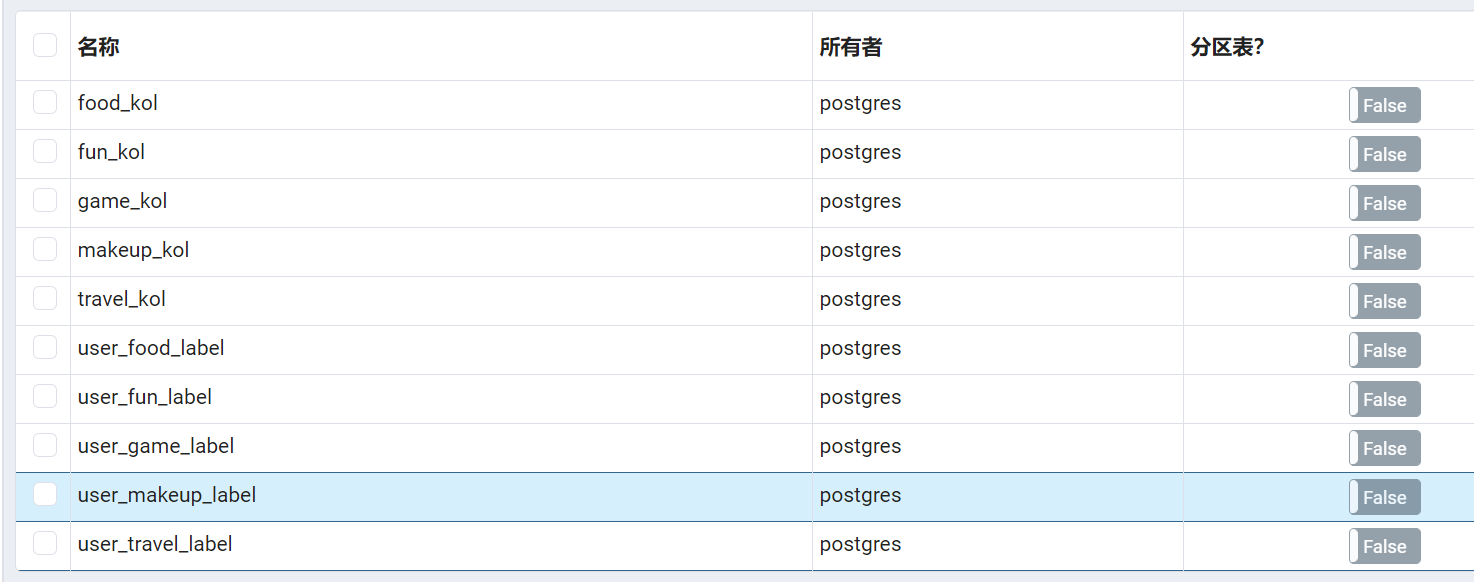

## 数据库文件读入

In [33]:
sql = 'select * from user_food_label limit 1000'

In [34]:
df = pd.read_sql(sql,engine).astype(str)
df

,num,user_id,nick_name,authentication,brief_intro,fan_num,follow_num,tweet_num,prop
0,3,7603244208,HuiQXX,None,None,1,6,2,0.5
1,5,7287751570,过往-0913,None,None,3,10,1,0.5
2,20,3269576041,mary3269576041,None,None,4,40,8,0.5
3,18,5845975189,酸甜苦辣咸么么哒,None,None,2,37,73,0.4864864864864865
4,13,7644454336,飞吗198803,None,None,4,27,23,0.4814814814814814
...,...,...,...,...,...,...,...,...,...
995,72,5059535242,咫尺天涯Wendy,None,None,150,638,1221,0.1128526645768025
996,22,1962171151,firefly-love,None,None,121,195,575,0.1128205128205128
997,16,7148188478,淡如云影52,None,None,1,142,4,0.1126760563380281
998,24,7645201207,SMNCTPINK,None,None,1,213,13,0.1126760563380281


In [37]:
sql = 'select * from fun_kol limit 100 offset 100'

In [38]:
df = pd.read_sql(sql,engine).astype(str)
df

,kol_id,nick_name,user_type,gender,province,city,vip_level,education,work,birthday,fan_num,follow_num,tweet_num,brief_intro,authentication,label,kol_con,con_seq
0,2302689504,你的笑点被我承包了,2,m,海外,其他,0,None,None,0001-00-00,324624.0,2.0,364.0,每日分享幽默搞笑视频，不搞笑我不发。,None,"正太辣妹,热门,无厘头",你的笑点被我承包了每日分享幽默搞笑视频，不搞笑我不发。nan,"['笑点', '承包', '分享', '幽默', '搞笑', '视频', '搞笑']"
1,2772565385,缪斯迷鹿,1,f,浙江,None,7,None,None,1966-04-10,4532451.0,106.0,9488.0,关注我，掌握时尚资讯。,知名搞笑幽默博主,None,缪斯迷鹿关注我，掌握时尚资讯。知名搞笑幽默博主,"['缪斯迷', '掌握', '时尚资讯', '知名', '搞笑', '幽默', '博主']"
2,2512527404,全球热门风云榜,2,m,海外,美国,1,None,None,None,501020.0,157.0,2394.0,热门资讯分享平台，每日分享新鲜、时尚、搞笑、有趣信息， 欢迎猛点✚加关注。合作：QQ5462...,None,"热门,时尚,摄影",全球热门风云榜热门资讯分享平台，每日分享新鲜、时尚、搞笑、有趣信息， 欢迎猛点✚加关注。合作...,"['热门', '热门', '资讯', '分享', '平台', '分享', '新鲜', '时尚..."
3,3166873540,我叫梁大白话,1,m,海外,西班牙,6,·北京外国语大学,None,1999-10-28,155560.0,670.0,1567.0,一个美少年,前 珈琳文化 网络写手 搞笑幽默博主,"龙珠,西游记,相声",我叫梁大白话一个美少年前 珈琳文化 网络写手 搞笑幽默博主,"['大白话', '文化', '网络', '写手', '搞笑', '幽默', '博主']"
4,1921017243,露贝丝bess,1,f,江苏,None,7,None,None,双子座,1357524.0,173.0,6679.0,彩妆/护肤 热爱记录的鬼马少女,微博知名搞笑博主,"好物分享,美妝",露贝丝bess彩妆/护肤 热爱记录的鬼马少女微博知名搞笑博主,"['露贝丝', '彩妆', '护肤', '热爱', '鬼马', '少女', '知名', '搞..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1858440512,我是此间少年郎-,1,m,其他,None,7,None,None,2019-10-14,128880.0,426.0,2014.0,这世间众生皆孤寂……,搞笑幽默博主,None,我是此间少年郎-这世间众生皆孤寂……搞笑幽默博主,"['少年郎', '世间', '众生', '孤寂', '搞笑', '幽默', '博主']"
96,6656706675,树洞,1,m,北京,None,6,·北京大学99级,None,1994-11-16,7591330.0,1015.0,8366.0,你的树洞🌳,知名搞笑幽默博主,"青岛生活,狗狗,网络营销",树洞你的树洞🌳知名搞笑幽默博主,"['树洞', '树洞', '知名', '搞笑', '幽默', '博主']"
97,2219088342,全球创意,1,m,江苏,南京,7,None,None,0001-00-00,3813317.0,48.0,43302.0,【微博内最齐全的创意组织】分享新鲜新奇的创意、设计、发明、搞笑、玩意、酷玩、时尚！,知名搞笑幽默博主,"汽车,科技,创意广告",全球创意【微博内最齐全的创意组织】分享新鲜新奇的创意、设计、发明、搞笑、玩意、酷玩、时尚！知...,"['创意', '齐全', '创意', '组织', '分享', '新鲜', '创意', '设计..."
98,5100613892,天秀主,1,f,广东,None,6,·北京传媒学院,·逗你乐传媒,巨蟹座,594572.0,521.0,70073.0,来呀，快活啊！,搞笑幽默博主,读书分享,天秀主来呀，快活啊！搞笑幽默博主,"['天秀主', '搞笑', '幽默', '博主']"
